In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [16]:
# Load data
data = pd.read_csv("C:/Users/Anuja Shinde/Desktop/PROJECT MAT/palmerpenguins_original.csv")

# Display basic info
print(data.info())
print(data.head())

# Handle missing values
data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN 

Missing Values Per Column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Percentage of Missing Values:
species              0.00
island               0.00
bill_length_mm       0.58
bill_depth_mm        0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  3.20
year                 0.00
dtype: float64


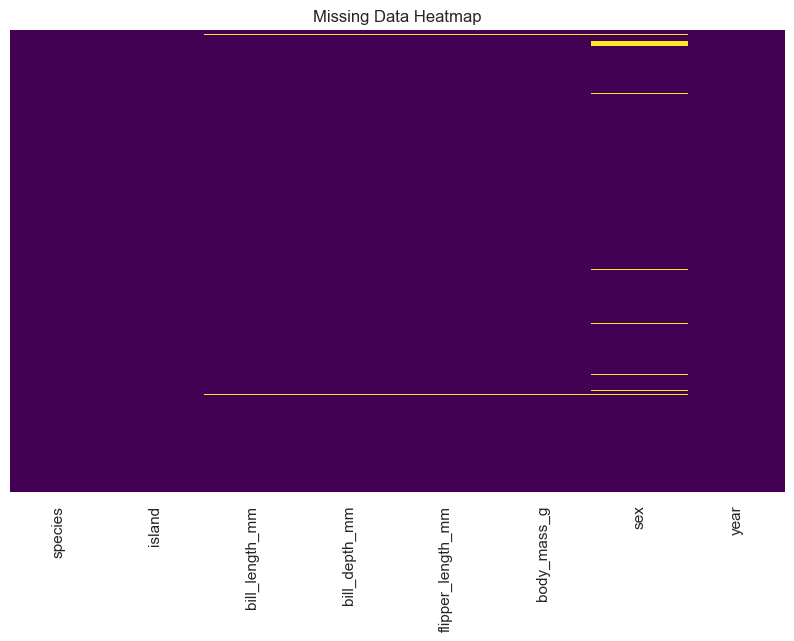

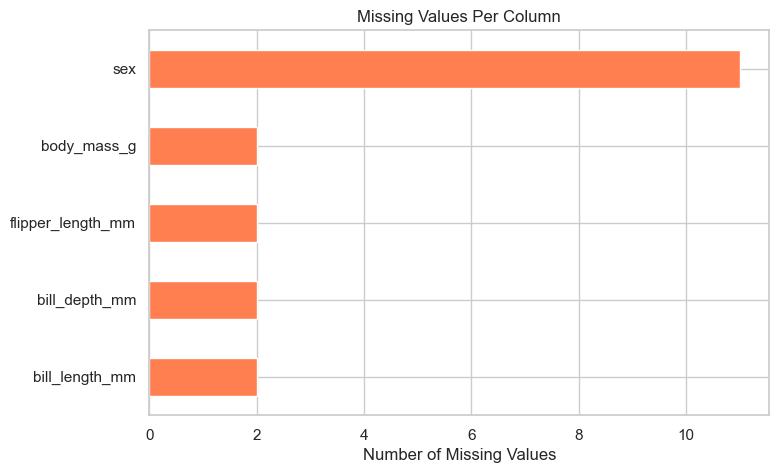

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/Anuja Shinde/Desktop/PROJECT MAT/palmerpenguins_original.csv")

# Display total missing values per column
print("Missing Values Per Column:")
print(data.isnull().sum())

# Display percentage of missing values
print("\nPercentage of Missing Values:")
print((data.isnull().mean() * 100).round(2))

# Visualize missing data as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

# Optionally: visualize using a bar chart
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.sort_values(inplace=True)

plt.figure(figsize=(8, 5))
missing_counts.plot(kind='barh', color='coral')
plt.xlabel('Number of Missing Values')
plt.title('Missing Values Per Column')
plt.show()

# Handle missing values - Option 1: Drop all rows with any missing values
clean_data = data.dropna()


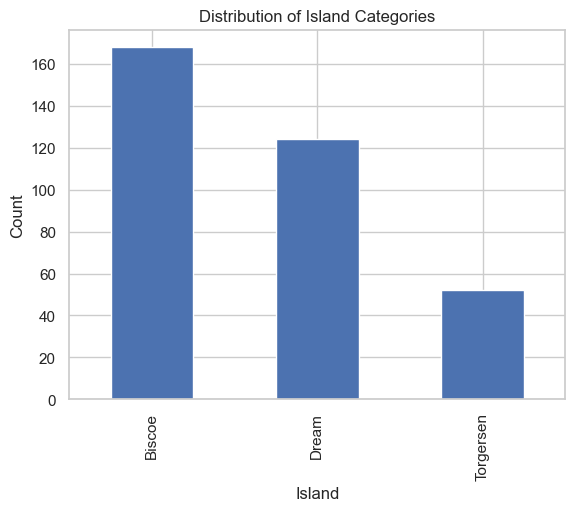

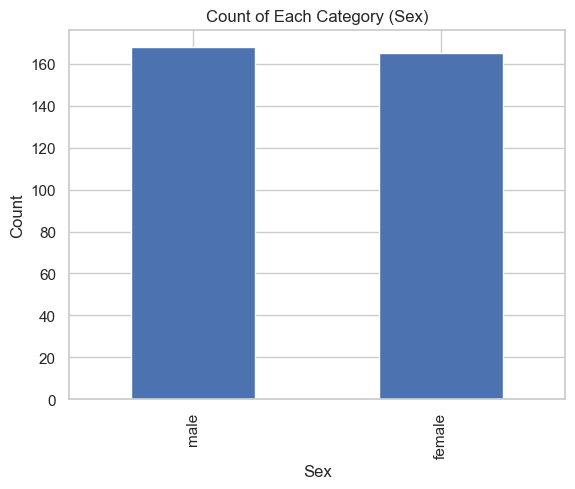

In [19]:
# Histogram of 'island' column (categorical, so use bar plot)
plt.figure()
data['island'].value_counts().plot(kind='bar')
plt.title('Distribution of Island Categories')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

# Replace 'YourCategoricalColumn' with an actual column name, for example: 'sex'
plt.figure()
data['sex'].value_counts().plot(kind='bar')
plt.title('Count of Each Category (Sex)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


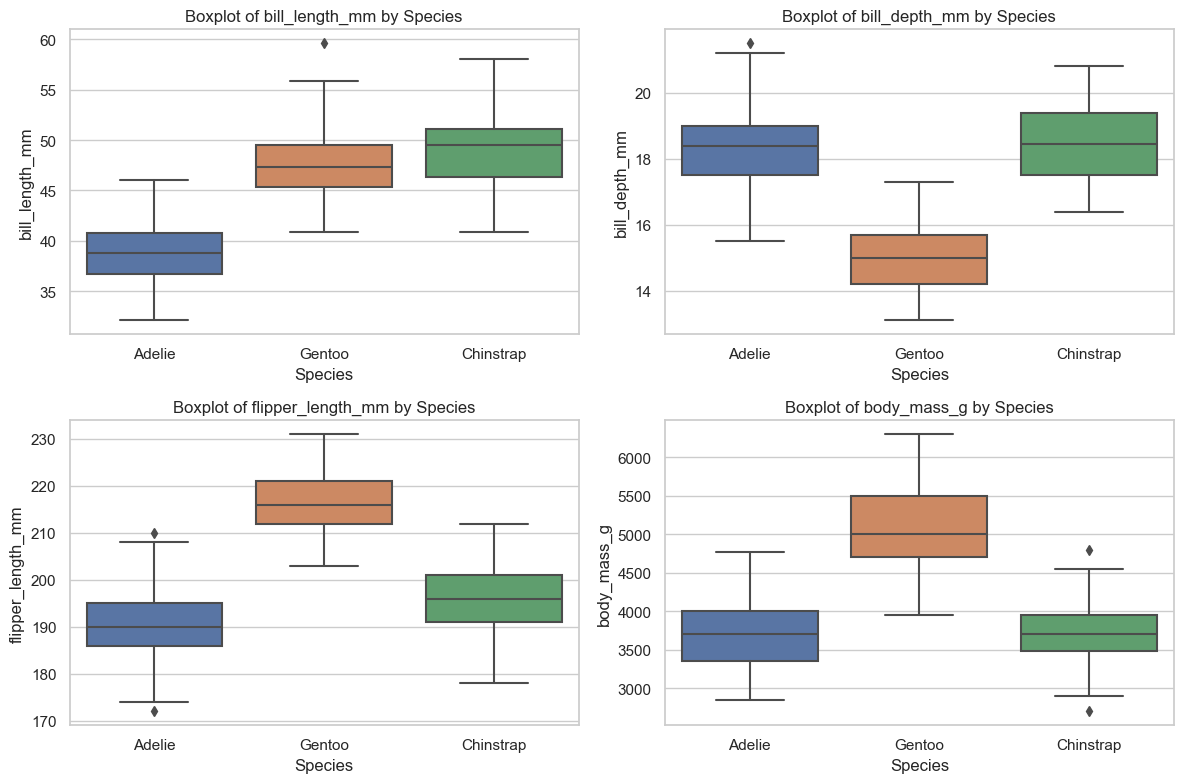

In [20]:
num_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=var, data=data)
    plt.title(f'Boxplot of {var} by Species')
    plt.xlabel('Species')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


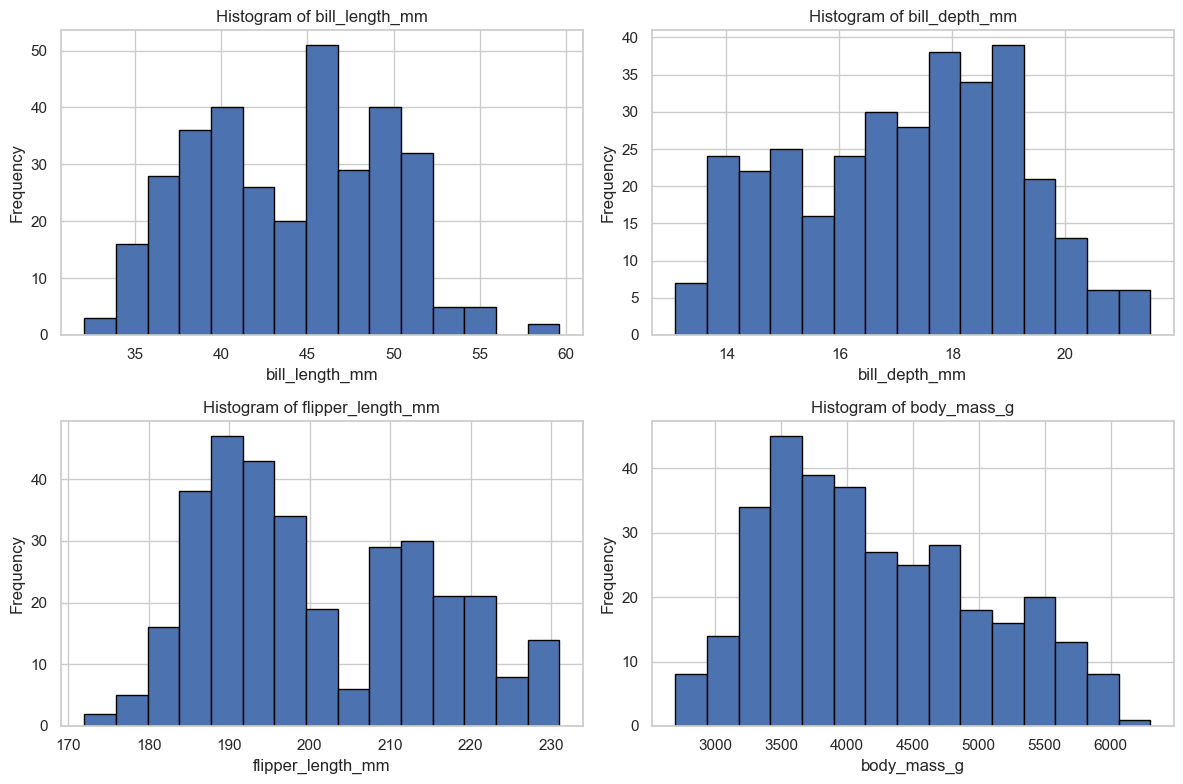

In [7]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    plt.hist(data[var], bins=15, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


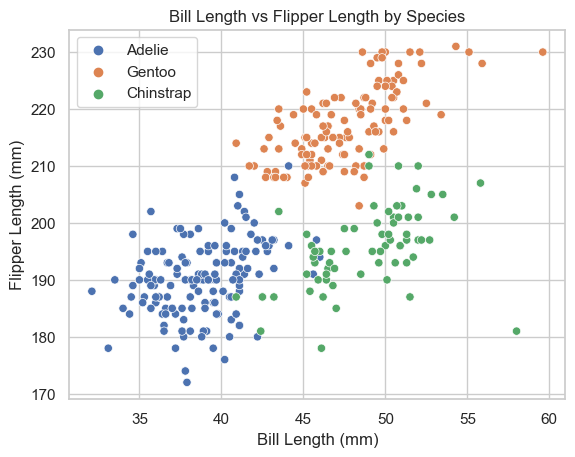

In [9]:
plt.figure()
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=data)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Bill Length vs Flipper Length by Species')
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

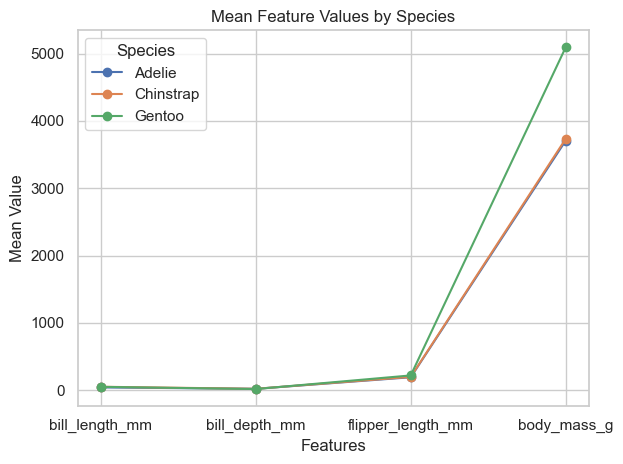

In [10]:
mean_values = data.groupby('species')[num_vars].mean()

plt.figure()
mean_values.T.plot(marker='o')
plt.xticks(ticks=range(len(num_vars)), labels=num_vars)
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Feature Values by Species')
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


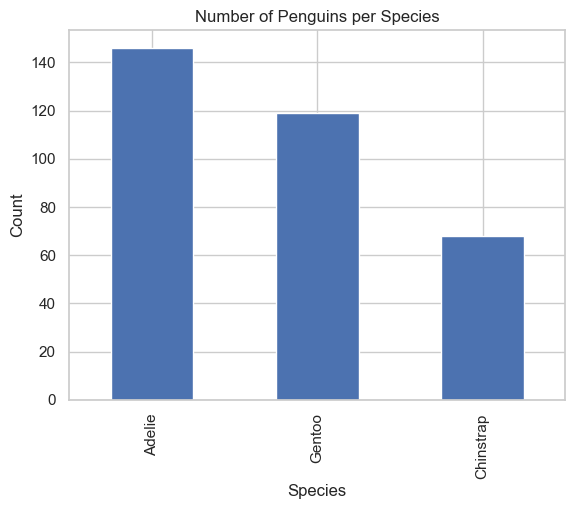

In [11]:
plt.figure()
data['species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Penguins per Species')
plt.show()


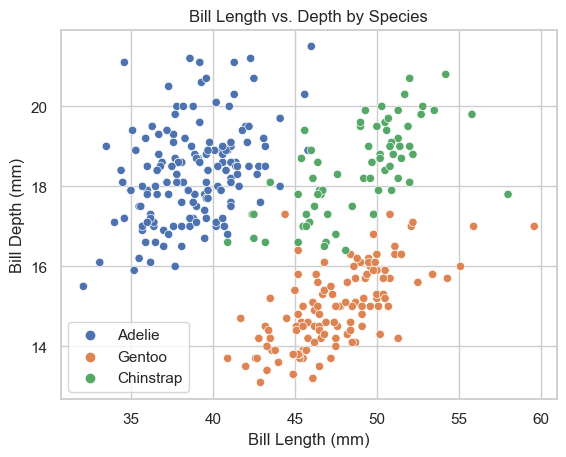

In [12]:
plt.figure()
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Length vs. Depth by Species')
plt.legend()
plt.show()


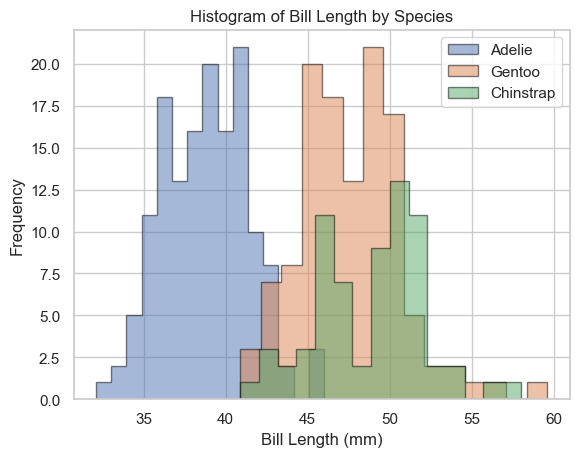

In [14]:
plt.figure()
for species in data['species'].unique():
    subset = data[data['species'] == species]
    plt.hist(subset['bill_length_mm'], bins=15, alpha=0.5, label=species, edgecolor='black', histtype='stepfilled')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Bill Length by Species')
plt.legend()
plt.show()



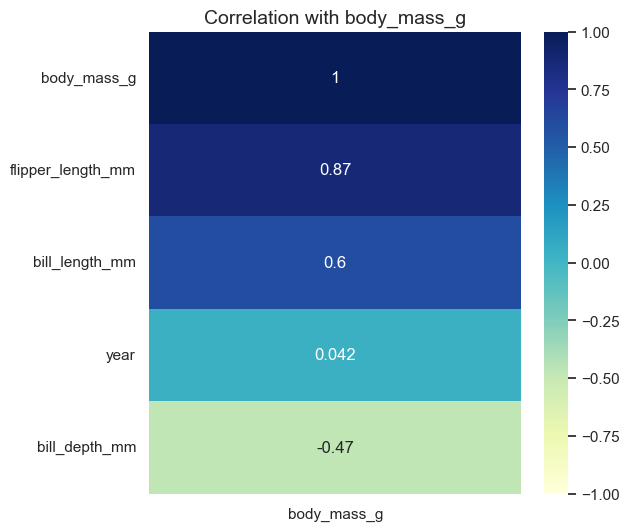

In [19]:
target = 'body_mass_g'
corr = data.select_dtypes(include=['float64', 'int64']).dropna().corr()
sorted_corr = corr[[target]].sort_values(by=target, ascending=False)
# Plot
plt.figure(figsize=(6, 6))
sns.heatmap(sorted_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title(f'Correlation with {target}', fontsize=14)
plt.show()
